In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [64]:
ticks = ['RELIANCE.BO', 'TITAN.BO', 'MARUTI.BO', 'ACC.BO', 
         'BAJFINANCE.BO', 'INFY.BO', 'TATACHEM.BO', 'GODREJPROP.BO', 
         'HINDUNILVR.BO', 'ITC.BO']
smp = pd.DataFrame()
for T in ticks:
  smp[T] = wb.DataReader(T, data_source='yahoo',start='2014-01-01')['Close']
s = smp.iloc[-1].sum()
smp

,RELIANCE.BO,TITAN.BO,MARUTI.BO,ACC.BO,BAJFINANCE.BO,INFY.BO,TATACHEM.BO,GODREJPROP.BO,HINDUNILVR.BO,ITC.BO
Date,,,,,,,,,,
2014-01-01,444.350006,230.800003,1763.349976,1107.699951,157.539993,433.299988,121.834999,180.399994,571.799988,214.733002
2014-01-02,437.674988,226.300003,1769.400024,1098.000000,157.800003,434.343994,118.024002,167.550003,562.750000,210.266998
2014-01-03,432.500000,227.199997,1798.550049,1088.650024,156.889999,445.681000,117.142998,168.149994,565.299988,209.899994
2014-01-06,427.450012,227.550003,1807.150024,1083.900024,155.225006,439.274994,116.813004,167.750000,563.750000,210.667007
2014-01-07,421.075012,225.550003,1846.500000,1083.900024,155.505005,432.174988,116.195999,167.199997,559.299988,211.167007
...,...,...,...,...,...,...,...,...,...,...
2020-04-03,1078.199951,862.700012,4011.649902,961.900024,2207.350098,585.450012,218.750000,607.099976,2153.550049,177.800003
2020-04-07,1206.400024,946.650024,4549.600098,1009.950012,2253.149902,641.099976,229.399994,701.900024,2444.600098,181.500000
2020-04-08,1192.150024,913.799988,4697.250000,956.750000,2333.000000,631.700012,228.649994,686.799988,2458.699951,178.600006


In [65]:
print(s)
ret = (smp / smp.shift(1)) - 1
wts = np.array([])
for t in ticks:
  wts = np.append(wts, smp.iloc[-1][t] / s)
wts = np.around(wts, decimals = 2)
print(wts)
ret

14860.599914550781
[0.08 0.07 0.36 0.07 0.15 0.04 0.02 0.04 0.16 0.01]


,RELIANCE.BO,TITAN.BO,MARUTI.BO,ACC.BO,BAJFINANCE.BO,INFY.BO,TATACHEM.BO,GODREJPROP.BO,HINDUNILVR.BO,ITC.BO
Date,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.015022,-0.019497,0.003431,-0.008757,0.001650,0.002409,-0.031280,-0.071231,-0.015827,-0.020798
2014-01-03,-0.011824,0.003977,0.016475,-0.008515,-0.005767,0.026101,-0.007465,0.003581,0.004531,-0.001745
2014-01-06,-0.011676,0.001541,0.004782,-0.004363,-0.010612,-0.014374,-0.002817,-0.002379,-0.002742,0.003654
2014-01-07,-0.014914,-0.008789,0.021775,0.000000,0.001804,-0.016163,-0.005282,-0.003279,-0.007894,0.002373
...,...,...,...,...,...,...,...,...,...,...
2020-04-03,-0.002267,-0.079050,-0.054659,-0.000208,-0.005743,-0.030872,-0.026480,0.017429,-0.011793,0.068831
2020-04-07,0.118902,0.097311,0.134097,0.049953,0.020749,0.095055,0.048686,0.156152,0.135149,0.020810
2020-04-08,-0.011812,-0.034701,0.032453,-0.052676,0.035439,-0.014662,-0.003269,-0.021513,0.005768,-0.015978


In [66]:
annual_return = ret.mean() * 250
print(annual_return)
portfolio_returnper = np.dot(annual_return, wts) * 100
portfolio_returnper

RELIANCE.BO      0.199322
TITAN.BO         0.284898
MARUTI.BO        0.220384
ACC.BO           0.029561
BAJFINANCE.BO    0.504129
INFY.BO          0.099652
TATACHEM.BO      0.147960
GODREJPROP.BO    0.283514
HINDUNILVR.BO    0.255951
ITC.BO           0.007524
dtype: float64


25.222869339922298

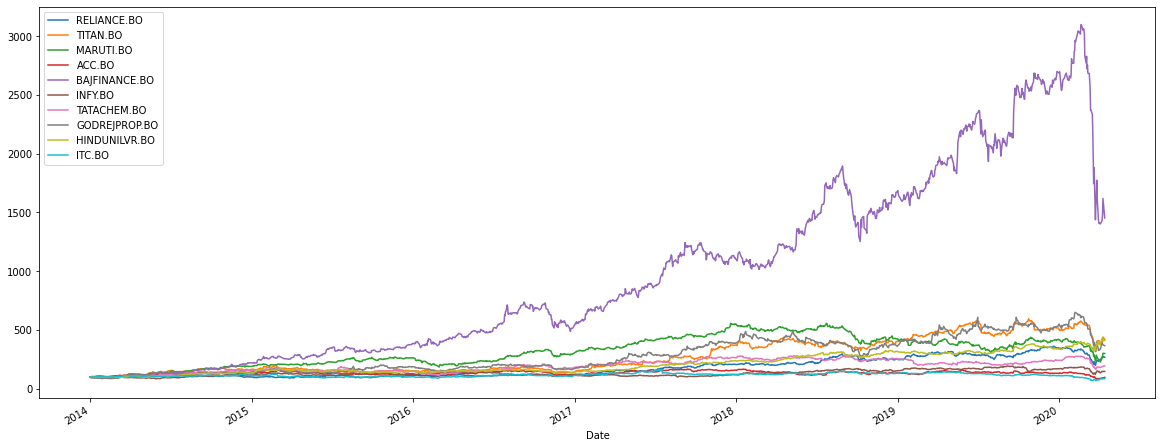

In [67]:
(smp / smp.iloc[0] * 100).plot(figsize = (20, 8));
plt.show()